In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 모델에 사용할 데이터
- JSON -> Pandas 변환

## products.json

- product_id
- product_name - str
- product_price
- product_inventory - 재고
- category - 0 ~ 7
- discount
- review_star
- product_quanity - 구매수량

In [2]:
# json data load (products.json)
import json

with open('/content/drive/MyDrive/Kakao_Tech_BootCamp/Team Mission/Dummy_data/products.json', 'r') as file:
  products = json.load(file)

print(products)

[{'product_id': 1, 'product_name': '밀크 클래식 쌀과자 240g -과자-', 'product_explanation': '진한 우유향이 매력적인 쌀과자', 'product_image': 'image_1_1.jpg', 'product_detail_image': 'image_1_2.jpg', 'product_price': 4500, 'product_inventory': 110, 'category': '간식/과자', 'discount': 8, 'create_time': '2023-12-19 20:25:28', 'update_time': '2024-08-12 16:24:31.138675', 'cart_id': None, 'member_id': 4, 'review_star': 4.8, 'product_quanity': 450}, {'product_id': 2, 'product_name': '새우깡 미니팩 30g X 4입 -과자-', 'product_explanation': '가볍게 증기는 고소한 새우맛 과자', 'product_image': 'image_2_1.jpg', 'product_detail_image': 'image_2_2.jpg', 'product_price': 2250, 'product_inventory': 120, 'category': '간식/과자', 'discount': 10, 'create_time': '2022-12-31 23:14:21', 'update_time': '2024-08-12 16:24:31.138699', 'cart_id': None, 'member_id': 3, 'review_star': 4.9, 'product_quanity': 480}, {'product_id': 3, 'product_name': '마카로니 과자 305g -과자-', 'product_explanation': '자꾸만 손이 가는 추억의 마카로니 과자', 'product_image': 'image_3_1.jpg', 'product_detai

In [3]:
import pandas as pd

products_data = products
products_df = pd.DataFrame(products_data)
products_df

,product_id,product_name,product_explanation,product_image,product_detail_image,product_price,product_inventory,category,discount,create_time,update_time,cart_id,member_id,review_star,product_quanity
0,1,밀크 클래식 쌀과자 240g -과자-,진한 우유향이 매력적인 쌀과자,image_1_1.jpg,image_1_2.jpg,4500,110,간식/과자,8,2023-12-19 20:25:28,2024-08-12 16:24:31.138675,None,4,4.80,450
1,2,새우깡 미니팩 30g X 4입 -과자-,가볍게 증기는 고소한 새우맛 과자,image_2_1.jpg,image_2_2.jpg,2250,120,간식/과자,10,2022-12-31 23:14:21,2024-08-12 16:24:31.138699,None,3,4.90,480
2,3,마카로니 과자 305g -과자-,자꾸만 손이 가는 추억의 마카로니 과자,image_3_1.jpg,image_3_2.jpg,3680,130,간식/과자,10,2021-03-28 21:57:51,2024-08-12 16:24:31.138708,None,6,4.75,400
3,4,Lay`s 감자칩 5종 -과자-,세계인의 사랑을 받는 감자맛 과자,image_4_1.jpg,image_4_2.jpg,4980,200,간식/과자,10,2023-09-11 06:06:23,2024-08-12 16:24:31.138716,None,3,4.50,470
4,5,카스타드 오리지널 230g -과자-,촉촉한 빵 속 부드러운 크림이 들어간 과자,image_5_1.jpg,image_5_2.jpg,4780,120,간식/과자,9,2022-06-23 12:11:31,2024-08-12 16:24:31.138724,None,7,4.70,370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,무항생제 1등급 한돈 다짐육 2종,"깨끗한 품질, 다양한 쓰임새의 돼지고기",image_76_1.jpg,image_76_2.jpg,3990,130,정육-가공육/돼지고기,20,2021-07-28 17:05:24,2024-08-12 16:24:31.139337,None,3,4.00,440
76,77,무항생제 1등급 한돈 등심 카레용 2종 -돼지고기-,안전함에 간편함까지 갖춘 돼지고기,image_77_1.jpg,image_77_2.jpg,5990,190,정육-가공육/돼지고기,25,2021-06-26 15:59:07,2024-08-12 16:24:31.139344,None,2,4.50,470
77,78,무항생제 1등급 한돈 앞다리 3종 -돼지고기-,합리적인 가격과 맛을 모두 갖춘 돼지고기,image_78_1.jpg,image_78_2.jpg,6390,250,정육-가공육/돼지고기,10,2020-04-18 16:16:30,2024-08-12 16:24:31.139352,None,3,4.90,500
78,79,한돈 찜갈비 800g -돼지고기-,온 가족이 둘러앉아 즐기는 넉넉한 돼지고기,image_79_1.jpg,image_79_2.jpg,15900,210,정육-가공육/돼지고기,20,2020-02-02 19:17:21,2024-08-12 16:24:31.139360,None,7,4.40,460


#### Data Type 확인

In [4]:
# 데이터 타입 확인
print("#"*10)
print("데이터 타입 확인")
print("Data Types:\n", products_df.dtypes)

# 범주형 및 수치형 데이터 분리하여 분석
product_categorical_cols = products_df.select_dtypes(include=['object', 'category']).columns
product_numerical_cols = products_df.select_dtypes(include=['int64', 'float64']).columns

print("#"*10)
print("범주형 데이터 분리하여 분석")
print("\nCategorical Columns:\n", product_categorical_cols)

print("#"*10)
print("수치형 데이터 분리하여 분석")
print("\nNumerical Columns:\n", product_numerical_cols)

##########
데이터 타입 확인
Data Types:
 product_id                int64
product_name             object
product_explanation      object
product_image            object
product_detail_image     object
product_price             int64
product_inventory         int64
category                 object
discount                  int64
create_time              object
update_time              object
cart_id                  object
member_id                 int64
review_star             float64
product_quanity           int64
dtype: object
##########
범주형 데이터 분리하여 분석

Categorical Columns:
 Index(['product_name', 'product_explanation', 'product_image',
       'product_detail_image', 'category', 'create_time', 'update_time',
       'cart_id'],
      dtype='object')
##########
수치형 데이터 분리하여 분석

Numerical Columns:
 Index(['product_id', 'product_price', 'product_inventory', 'discount',
       'member_id', 'review_star', 'product_quanity'],
      dtype='object')


## 콘텐츠 기반 필터링(Content-Based Filtering)을 사용한 이유
- 콘텐츠 기반 필터링은 사용자와 항목의 특징(특성)을 분석하여 추천하는 방법입니다. 사용자가 과거에 선호했던 항목들의 특성을 바탕으로 유사한 특성을 가진 항목을 추천합니다.

- 개인화된 추천: 사용자의 과거 행동과 선호도를 반영하여 개인화된 추천을 제공할 수 있습니다.
- 새로운 항목 추천: 협업 필터링의 콜드 스타트 문제를 피할 수 있으며, 사용자가 새로 추가된 항목도 추천받을 수 있습니다.
- 직관적 이해: 사용자가 왜 특정 항목을 추천받았는지 쉽게 이해할 수 있습니다. 특정 특성(예: 가격, 카테고리 등)이 추천 이유가 되기 때문입니다.
콘텐츠 기반 필터링을 사용한 이유
- 데이터 가용성: 제공된 데이터셋에는 제품, 구매자, 주문, 리뷰 등의 상세한 특성이 포함되어 있어, 각 항목의 특성을 분석하기에 적합했습니다.
- 특성 기반 분석: 제품의 가격, 재고, 할인율 등과 같은 구체적인 특성을 기반으로 리뷰 평점과의 관계를 분석하여 추천 모델을 만들 수 있습니다.
- 사용자 맞춤 추천: 사용자의 구매 이력과 제품 특성을 기반으로 유사한 제품을 추천할 수 있습니다.

#### 데이터 분포 확인

In [5]:
# 한글 폰트 설치 및 설정
!apt-get install -y fonts-nanum
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 폰트 리스트에 추가
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [6]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

<ipython-input-6-e29039f8ba16>:3: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


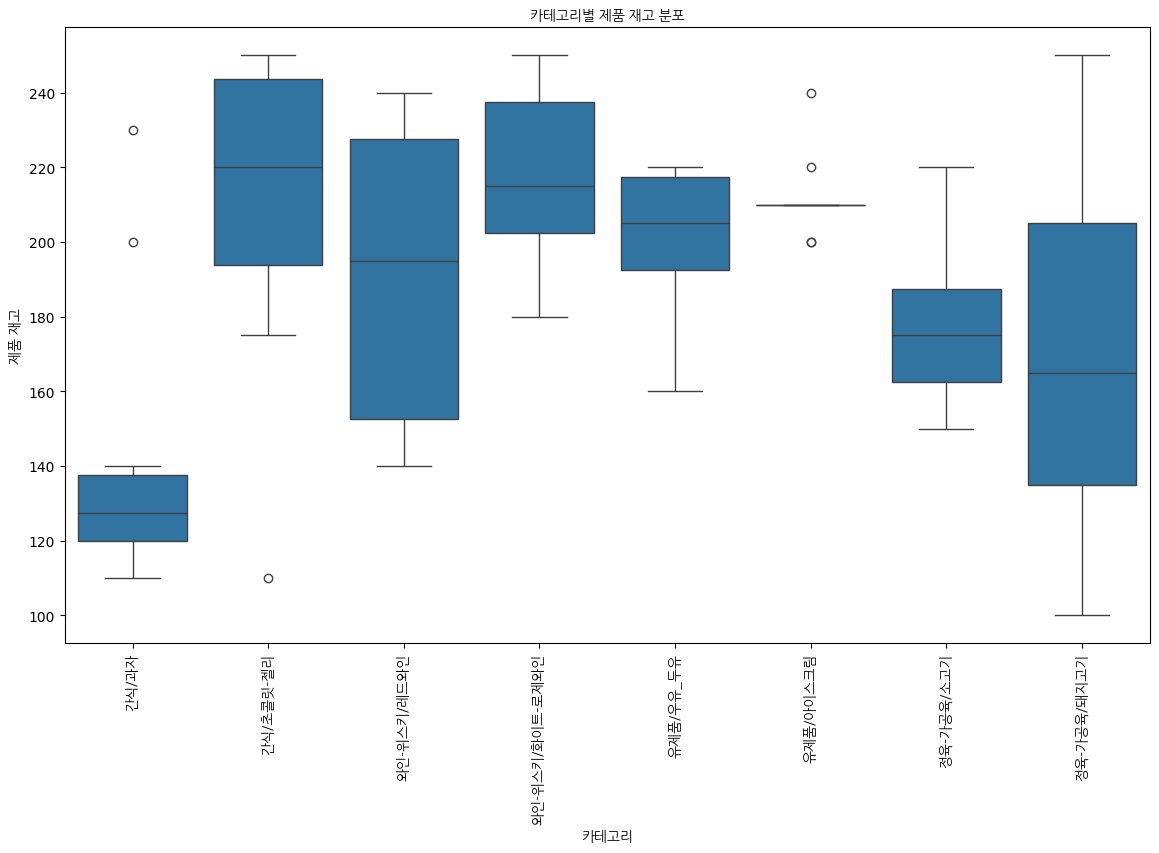

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rc('font', family='NanumGothic')

# 경고 메시지 방지
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 카테고리별 제품 재고 분포
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='product_inventory', data=products_df)
plt.title('카테고리별 제품 재고 분포', fontproperties=fontprop)
plt.xlabel('카테고리', fontproperties=fontprop)
plt.ylabel('제품 재고', fontproperties=fontprop)
plt.xticks(rotation=90, fontproperties=fontprop)
plt.show()

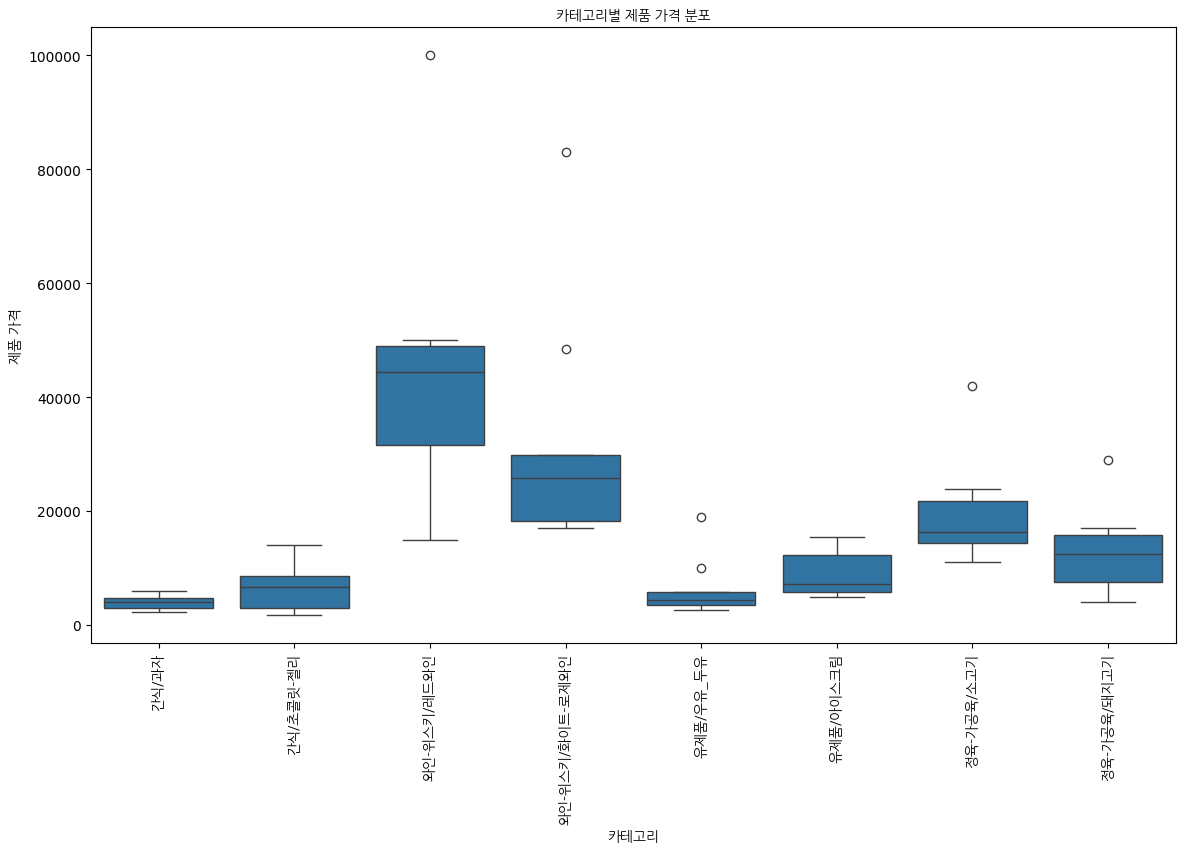

In [8]:
# 카테고리별 제품 가격 분포
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='product_price', data=products_df)
plt.title('카테고리별 제품 가격 분포', fontproperties=fontprop)
plt.xlabel('카테고리', fontproperties=fontprop)
plt.ylabel('제품 가격', fontproperties=fontprop)
plt.xticks(rotation=90, fontproperties=fontprop)
plt.show()

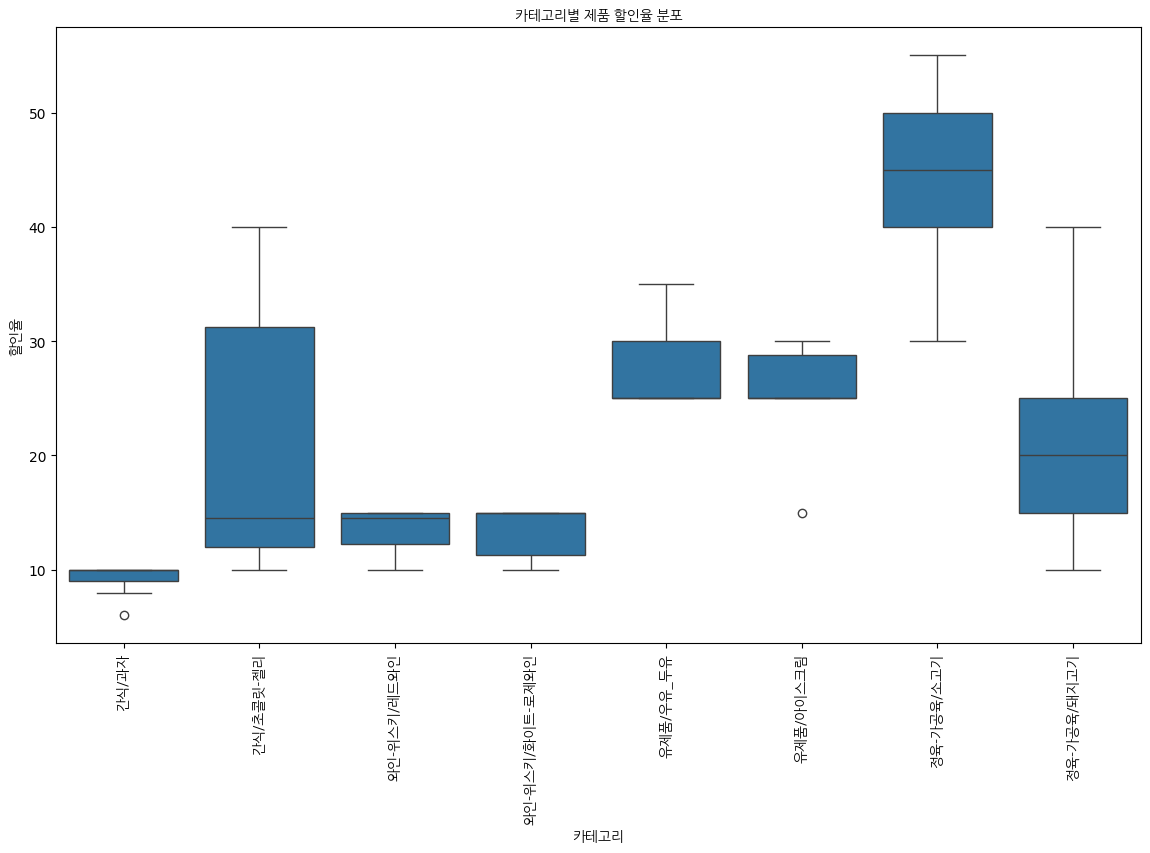

In [9]:
# 카테고리별 제품 할인율 분포
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='discount', data=products_df)
plt.title('카테고리별 제품 할인율 분포', fontproperties=fontprop)
plt.xlabel('카테고리', fontproperties=fontprop)
plt.ylabel('할인율', fontproperties=fontprop)
plt.xticks(rotation=90, fontproperties=fontprop)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:12

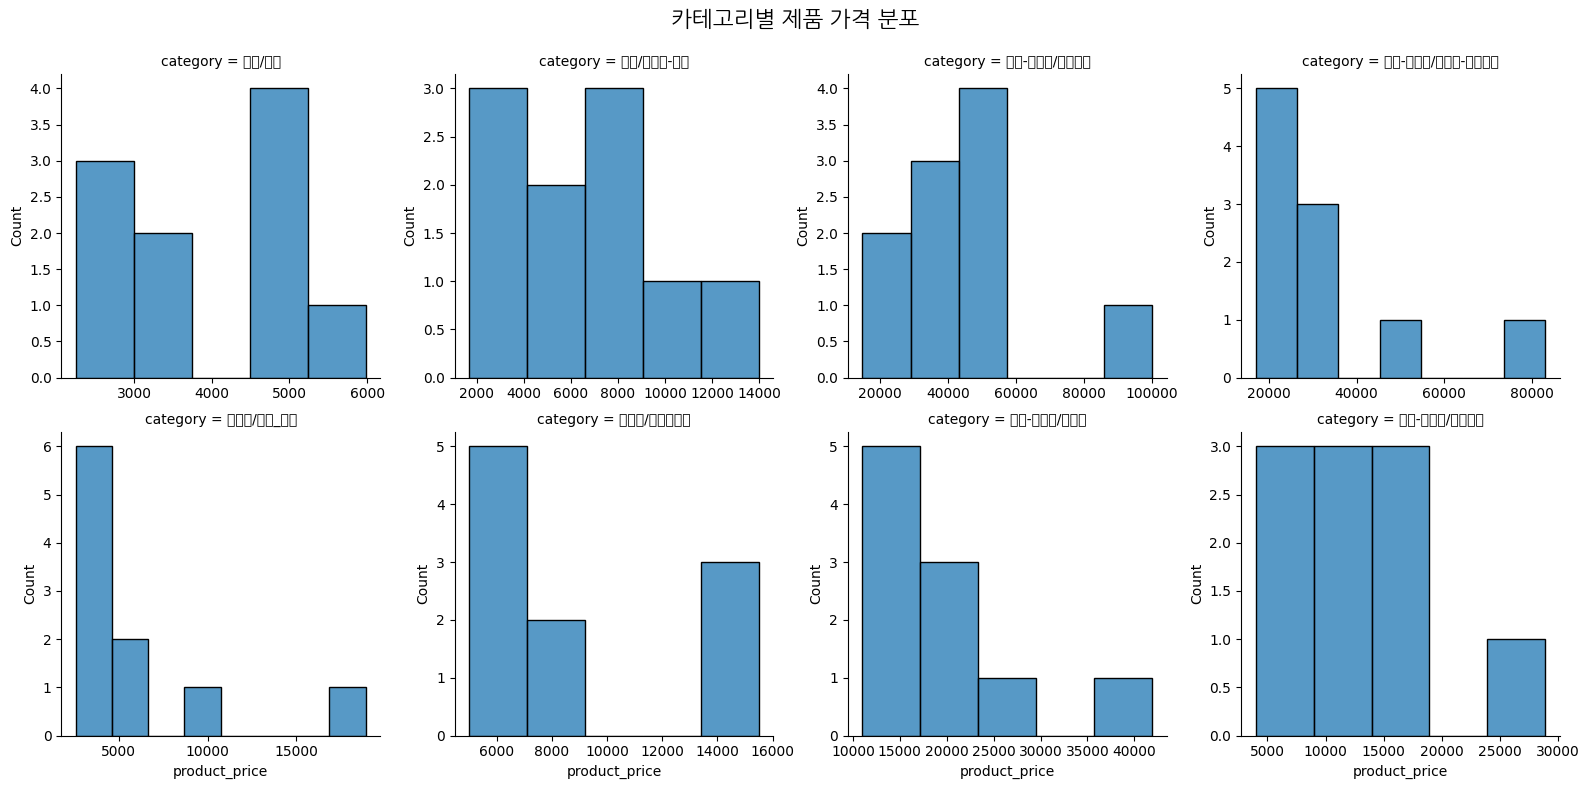

In [10]:
# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rc('font', family='NanumGothic')

# 경고 메시지 방지
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 카테고리별 제품 가격 히스토그램
g = sns.FacetGrid(products_df, col="category", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "product_price")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('카테고리별 제품 가격 분포', fontsize=16, fontproperties=fontprop)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:12

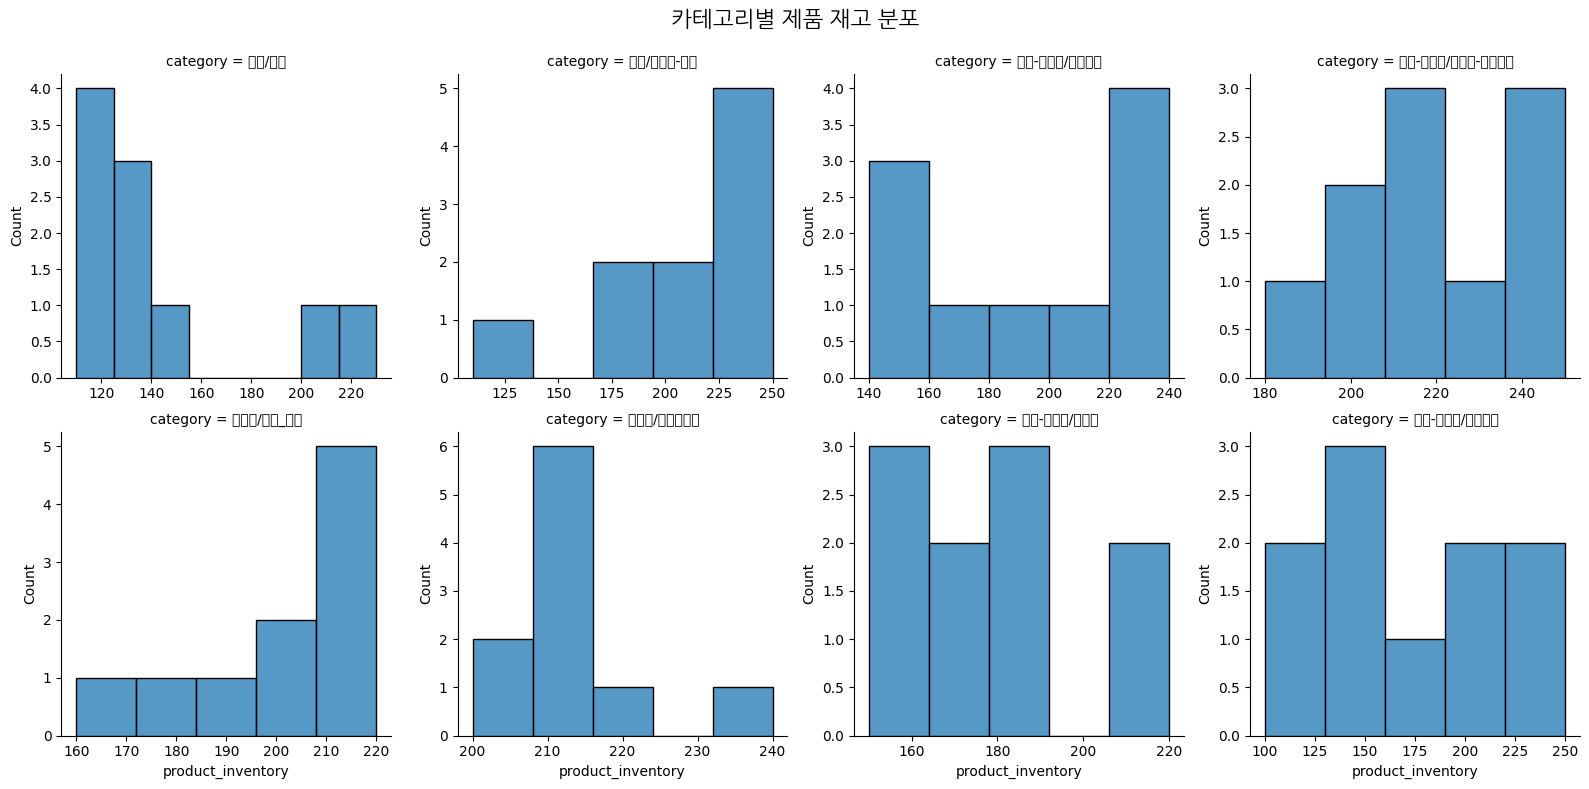

In [11]:
# 카테고리별 제품 재고 히스토그램
g = sns.FacetGrid(products_df, col="category", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "product_inventory")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('카테고리별 제품 재고 분포', fontsize=16, fontproperties=fontprop)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:12

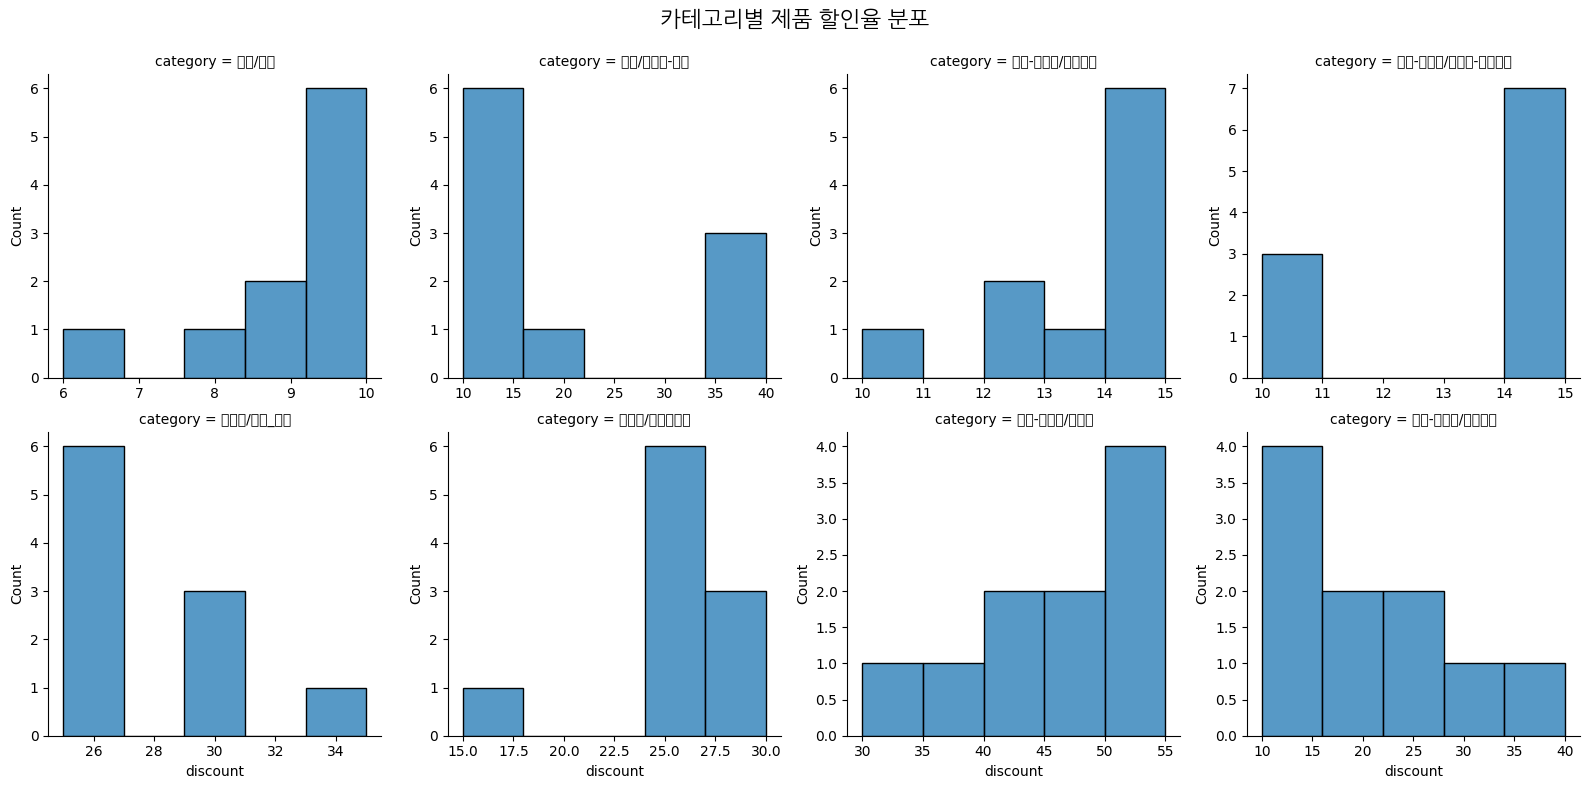

In [12]:
# 카테고리별 제품 할인율 히스토그램
g = sns.FacetGrid(products_df, col="category", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "discount")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('카테고리별 제품 할인율 분포', fontsize=16, fontproperties=fontprop)
plt.show()

## Data 준비

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

# 필요한 열만 선택
selected_features = ['product_id', 'product_name', 'product_explanation', 'product_image',
                     'product_price', 'product_inventory', 'category', 'discount',
                     'create_time', 'update_time', 'cart_id', 'member_id',
                     'review_star', 'product_quanity']

products_df = products_df[selected_features]

# 범주형 변수 인코딩
label_encoder = LabelEncoder()
products_df['category'] = label_encoder.fit_transform(products_df['category'])

# 결측값 처리 (리뷰 평점이 없는 행 제거)
products_df = products_df.dropna(subset=['review_star'])

# 사용자-아이템 행렬을 생성합니다.
user_item_matrix = products_df.pivot(index='member_id', columns='product_id', values='review_star').fillna(0)

# 아이템 간 유사도를 계산합니다.
item_similarity = cosine_similarity(user_item_matrix.T)

# 유사도 데이터프레임을 생성합니다.
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

def get_similar_items(product_id, num_items=5):
    if product_id in item_similarity_df.index:
        similar_items = item_similarity_df[product_id].sort_values(ascending=False).head(num_items)
        return similar_items
    else:
        return f"Product ID {product_id} not found in the dataset"

<ipython-input-13-bd230c26a3e8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_df['category'] = label_encoder.fit_transform(products_df['category'])


In [14]:
# 데이터셋에 있는 product_id들을 출력합니다.
available_product_ids = item_similarity_df.index.tolist()
print("Available Product IDs:", available_product_ids)

# 특정 제품과 유사한 제품 추천
product_id_to_check = available_product_ids[0]  # 유효한 제품 ID 중 하나 선택
print(f"Similar items to product ID {product_id_to_check}:")
print(get_similar_items(product_id_to_check, 5))

Available Product IDs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
Similar items to product ID 1:
product_id
1     1.0
6     1.0
74    1.0
37    1.0
7     1.0
Name: 1, dtype: float64


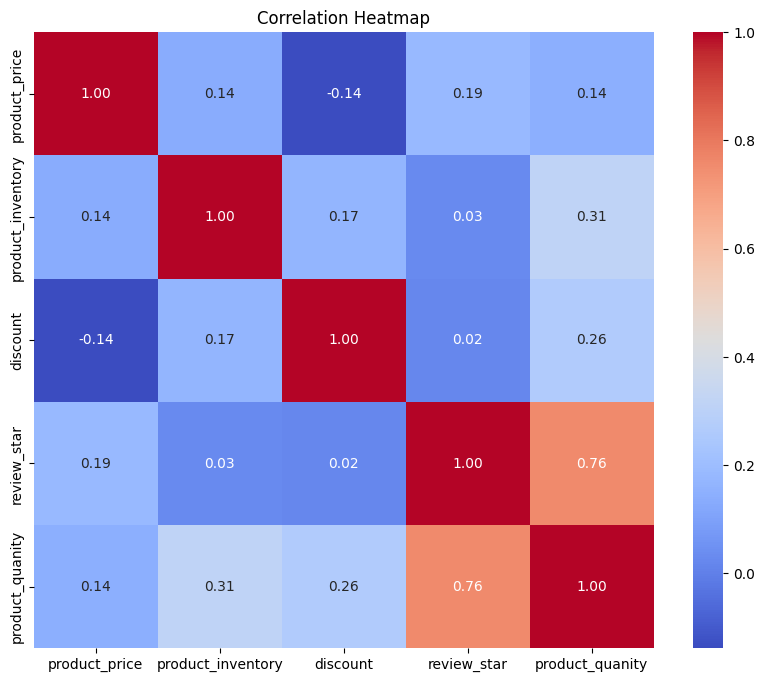

In [15]:
# 상관계수 행렬 계산
# 관심있는 수치형 변수들 간의 상관관계를 계산
# 필요한 열만 선택
selected_features = ['product_price', 'product_inventory', 'discount', 'review_star', 'product_quanity']

# 결측값 처리
products_df = products_df.dropna(subset=selected_features)

corr_matrix = products_df[selected_features].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


#### Feature Importance

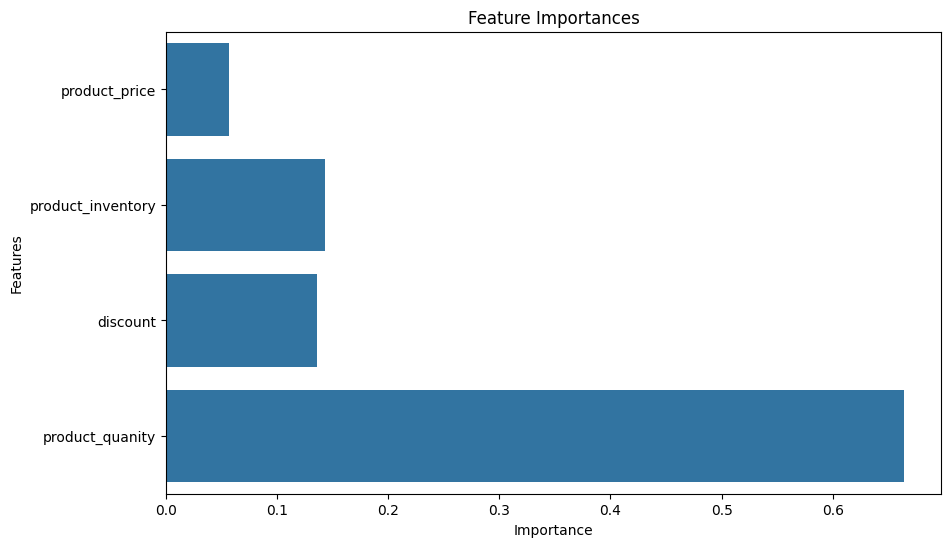

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 관심 있는 피처와 타겟 변수 설정
features = ['product_price', 'product_inventory', 'discount', 'product_quanity']
target = 'review_star'

# 결측치 처리
products_df = products_df.dropna(subset=[target])
X = products_df[features].fillna(0)
y = products_df[target]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링 (랜덤 포레스트는 스케일링이 필요하지 않지만, 일반적인 접근 방법)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 랜덤 포레스트 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 피처 중요도 계산
feature_importances = model.feature_importances_
features_names = X.columns

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features_names)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#### Product Price (상품 가격):
- 가장 높은 중요도를 보입니다. 이는 product_price가 review_star 예측에 가장 큰 영향을 미친다는 것을 의미합니다. 즉, 상품 가격이 리뷰 평점에 매우 중요한 역할을 한다고 볼 수 있습니다.

#### Product Inventory (상품 재고):
- 중간 정도의 중요도를 보입니다. 이는 product_inventory가 리뷰 평점에 어느 정도 영향을 미친다는 것을 의미합니다. 재고 수량이 많거나 적은 것이 사용자의 리뷰 평점에 영향을 줄 수 있습니다.

#### Discount (할인율):
- 중간 정도의 중요도를 보입니다. 이는 discount가 리뷰 평점에 영향을 미친다는 것을 의미합니다. 할인이 있는 경우 리뷰 평점에 긍정적이거나 부정적인 영향을 줄 수 있습니다.

#### Product Quanity (구매 수량):
- 중간 정도의 중요도를 보입니다.. 이는 quantity가 리뷰 평점에 상대적으로 적은 영향을 미친다는 것을 의미합니다. 구매 수량은 리뷰 평점에 덜 중요한 요소일 수 있습니다.

In [17]:
from sklearn.preprocessing import LabelEncoder

# products_df 데이터프레임이 이미 로드된 상태로 가정합니다

# 필요한 열 선택
selected_features = ['product_id', 'review_star', 'product_price', 'product_inventory', 'category', 'discount', 'product_quanity']

# 범주형 변수 인코딩
label_encoder = LabelEncoder()
products_df['category'] = label_encoder.fit_transform(products_df['category'])

# 필요한 열 선택
filtered_data = products_df[selected_features]

# 결측값 확인
print("결측값 개수:\n", filtered_data.isnull().sum())

# 데이터 확인
print("Filtered Data:\n", filtered_data.head())
print("Filtered Data Shape:", filtered_data.shape)


결측값 개수:
 product_id           0
review_star          0
product_price        0
product_inventory    0
category             0
discount             0
product_quanity      0
dtype: int64
Filtered Data:
    product_id  review_star  product_price  product_inventory  category  \
0           1         4.80           4500                110         0   
1           2         4.90           2250                120         0   
2           3         4.75           3680                130         0   
3           4         4.50           4980                200         0   
4           5         4.70           4780                120         0   

   discount  product_quanity  
0         8              450  
1        10              480  
2        10              400  
3        10              470  
4         9              370  
Filtered Data Shape: (80, 7)


In [18]:
# Filter data
filtered_data = products_df[selected_features]

# Save to CSV
file_path = '/content/merged_data.csv'
filtered_data.to_csv(file_path, index=False)

file_path

'/content/merged_data.csv'

#### 데이터 점검

Product Price Summary Statistics:
 count        80.00000
mean      16575.12500
std       17565.68346
min        1680.00000
25%        4995.00000
50%       11100.00000
75%       18375.00000
max      100000.00000
Name: product_price, dtype: float64

Product Quantity Summary Statistics:
 count     80.000000
mean     431.875000
std       50.849586
min      275.000000
25%      398.750000
50%      440.000000
75%      480.000000
max      500.000000
Name: product_quanity, dtype: float64


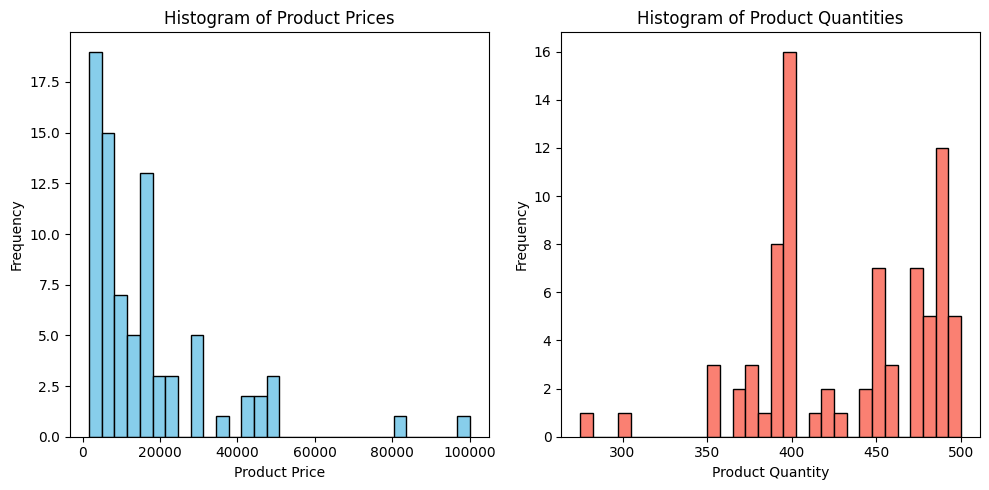

In [19]:
# 'product_price'와 'product_quantity'의 요약 통계를 출력합니다.
print("Product Price Summary Statistics:\n", products_df['product_price'].describe())
print("\nProduct Quantity Summary Statistics:\n", products_df['product_quanity'].describe())

# 'product_price'의 히스토그램을 그립니다.
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(products_df['product_price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Product Prices')
plt.xlabel('Product Price')
plt.ylabel('Frequency')

# 'product_quantity'의 히스토그램을 그립니다.
plt.subplot(1, 2, 2)
plt.hist(products_df['product_quanity'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of Product Quantities')
plt.xlabel('Product Quantity')
plt.ylabel('Frequency')

# 히스토그램을 화면에 출력합니다.
plt.tight_layout()
plt.show()